## Exercise 6.2: Gaussian Processes for Bayesian Optimization

A typcial predictive model used in Bayesian Optimization are Gaussian Processes (GPs). In this exercise, your task will be to run one iteration of BO to pick the next x.

In [132]:
%matplotlib inline

In [133]:
# let's assume we have some observations already
import numpy as np
X = np.array([[1],[3],[4],[5]])
y = np.array([10,3,4,8])

### Task 1: 
Fit a GP on the observations

In [134]:
# import GP from sklearn
# Please note that there are better GP libraries such as GPy
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# TODO create GP object and fit it on the observations from above
# use kernel=RBF(1.0, length_scale_bounds="fixed")*C(10.0, constant_value_bounds="fixed"), 
# and normalize_y=True
gp = GaussianProcessRegressor(
    kernel=RBF(1.0, length_scale_bounds="fixed")*C(10.0, constant_value_bounds="fixed"), 
    normalize_y=True)
gp.fit(X,y)

# TODO check prediction on X=[[2]] and also return stdev
gp.predict([[2]], return_std=True)

(array([6.92612999]), array([1.65166663]))

### Task 2: 
Implement lower confidence bounds (LCB) as acquisition function since we want to minimize in our example

In [135]:
def lcb(x, kappa=1):
    # TODO
    mean, stdev = gp.predict([x], return_std=True)
    return mean[0] - kappa*stdev[0]

# Test
lcb([2])

5.274463362499144

### Task 3: 
Use scipy.minimize to optimize the acquisition function in the range (1,5)

In [136]:
from scipy.optimize import minimize

res = minimize(lcb, x0=[2], bounds=[(1,5)] )
print(res)

      fun: 2.255745311099336
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.88498131e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 3
   status: 0
  success: True
        x: array([3.38372654])


### Task 4: 
Plot the observations, the GP, the acquisition function and the choosen x

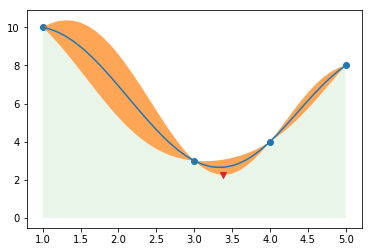

In [137]:
import matplotlib.pyplot as plt

# TODO plot observations X,y
plt.scatter(X,y)

# TODO plot GP
x_range = np.arange(1., 5.1, 0.1)
y_gp, y_stdev = gp.predict(np.reshape(x_range, (-1, 1)), return_std=True)
plt.plot(x_range, y_gp)
plt.fill_between(x_range, y_gp+y_stdev, y_gp-y_stdev, alpha=.7)

# TODO plot acqusition function
acqs = np.array([lcb([x]) for x in x_range])
plt.fill_between(x_range,  acqs, alpha=.1)

# TODO plot best x according to acqusition function
plt.scatter([res.x],[res.fun], marker='v')